<a href="https://colab.research.google.com/github/nithin1762/AIML_2303A52011/blob/main/Lab_10__AIML_2303A52011.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Implement K-Means Clustering using Household Electricity Consumption Dataset.

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
power_com = fetch_ucirepo(id=235)

/usr/local/lib/python3.10/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [ ]:
# data (as pandas dataframes)
X = power_com.data.features
y = power_com.data.targets

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
print(f"Top 5 Elecricity Consumption features:\n{power_com.data.features.sort_values(by='Date', ascending=False).head()}")



Top 5 Elecricity Consumption features:
             Date      Time Global_active_power Global_reactive_power  \
1961817  9/9/2010  02:21:00               0.238                 0.052   
1962837  9/9/2010  19:21:00               0.390                 0.132   
1962857  9/9/2010  19:41:00               2.938                 0.436   
1962856  9/9/2010  19:40:00               2.898                 0.416   
1962855  9/9/2010  19:39:00               2.886                 0.398   

         Voltage Global_intensity Sub_metering_1 Sub_metering_2  \
1961817  239.790            1.000          0.000          1.000   
1962837  243.580            1.600          0.000          0.000   
1962857  241.510           12.200          0.000         38.000   
1962856  241.090           12.000          0.000         38.000   
1962855  241.070           12.000          0.000         38.000   

         Sub_metering_3  
1961817             1.0  
1962837             1.0  
1962857             1.0  
1962856        

In [ ]:
print(f"Top 5 Voltage Consumption features:\n{power_com.data.features.sort_values(by='Date', ascending=True).tail()}")


Top 5 Voltage Consumption features:
             Date      Time Global_active_power Global_reactive_power  \
1962153  9/9/2010  07:57:00               1.430                 0.080   
1962152  9/9/2010  07:56:00               1.428                 0.076   
1962151  9/9/2010  07:55:00               1.392                 0.000   
1962149  9/9/2010  07:53:00               1.392                 0.000   
1961677  9/9/2010  00:01:00               0.808                 0.116   

         Voltage Global_intensity Sub_metering_1 Sub_metering_2  \
1962153  239.200            6.000          0.000          1.000   
1962152  238.390            6.000          0.000          1.000   
1962151  238.050            5.800          0.000          0.000   
1962149  238.610            5.800          0.000          0.000   
1961677  246.140            3.400          0.000          0.000   

         Sub_metering_3  
1962153            18.0  
1962152            18.0  
1962151            18.0  
1962149           

In [ ]:
df = pd.DataFrame(power_com.data.features)
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


from matplotlib import pyplot as plt
_df_0['Sub_metering_3'].plot(kind='hist', bins=20, title='Sub_metering_3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Time').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Global_active_power').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Global_reactive_power').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Voltage').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Sub_metering_3']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Time')):
  _plot_series(series, series_name, i)
  fig.legend(title='Time', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Sub_metering_3')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Sub_metering_3']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Global_active_power')):
  _plot_series(series, series_name, i)
  fig.legend(title='Global_active_power', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Sub_metering_3')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Sub_metering_3']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Global_reactive_power')):
  _plot_series(series, series_name, i)
  fig.legend(title='Global_reactive_power', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Sub_metering_3')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Sub_metering_3']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Voltage')):
  _plot_series(series, series_name, i)
  fig.legend(title='Voltage', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Sub_metering_3')

from matplotlib import pyplot as plt
_df_9['Sub_metering_3'].plot(kind='line', figsize=(8, 4), title='Sub_metering_3')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Global_active_power'].value_counts()
    for x_label, grp in _df_10.groupby('Time')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Time')
_ = plt.ylabel('Global_active_power')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Global_reactive_power'].value_counts()
    for x_label, grp in _df_11.groupby('Global_active_power')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Global_active_power')
_ = plt.ylabel('Global_reactive_power')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Voltage'].value_counts()
    for x_label, grp in _df_12.groupby('Global_reactive_power')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Global_reactive_power')
_ = plt.ylabel('Voltage')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Global_intensity'].value_counts()
    for x_label, grp in _df_13.groupby('Voltage')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Voltage')
_ = plt.ylabel('Global_intensity')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['Time'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='Sub_metering_3', y='Time', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['Global_active_power'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='Sub_metering_3', y='Global_active_power', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['Global_reactive_power'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='Sub_metering_3', y='Global_reactive_power', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Voltage'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='Sub_metering_3', y='Voltage', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


from matplotlib import pyplot as plt
df['Sub_metering_3'].plot(kind='hist', bins=20, title='Sub_metering_3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Sub_metering_3']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Sub_metering_3')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['Sub_metering_3']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('Sub_metering_3')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Time'}, axis=1)
              .sort_values('Time', ascending=True))
  xs = counted['Time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df['Sub_metering_3'].plot(kind='line', figsize=(8, 4), title='Sub_metering_3')
plt.gca().spines[['top', 'right']].set_visible(False)

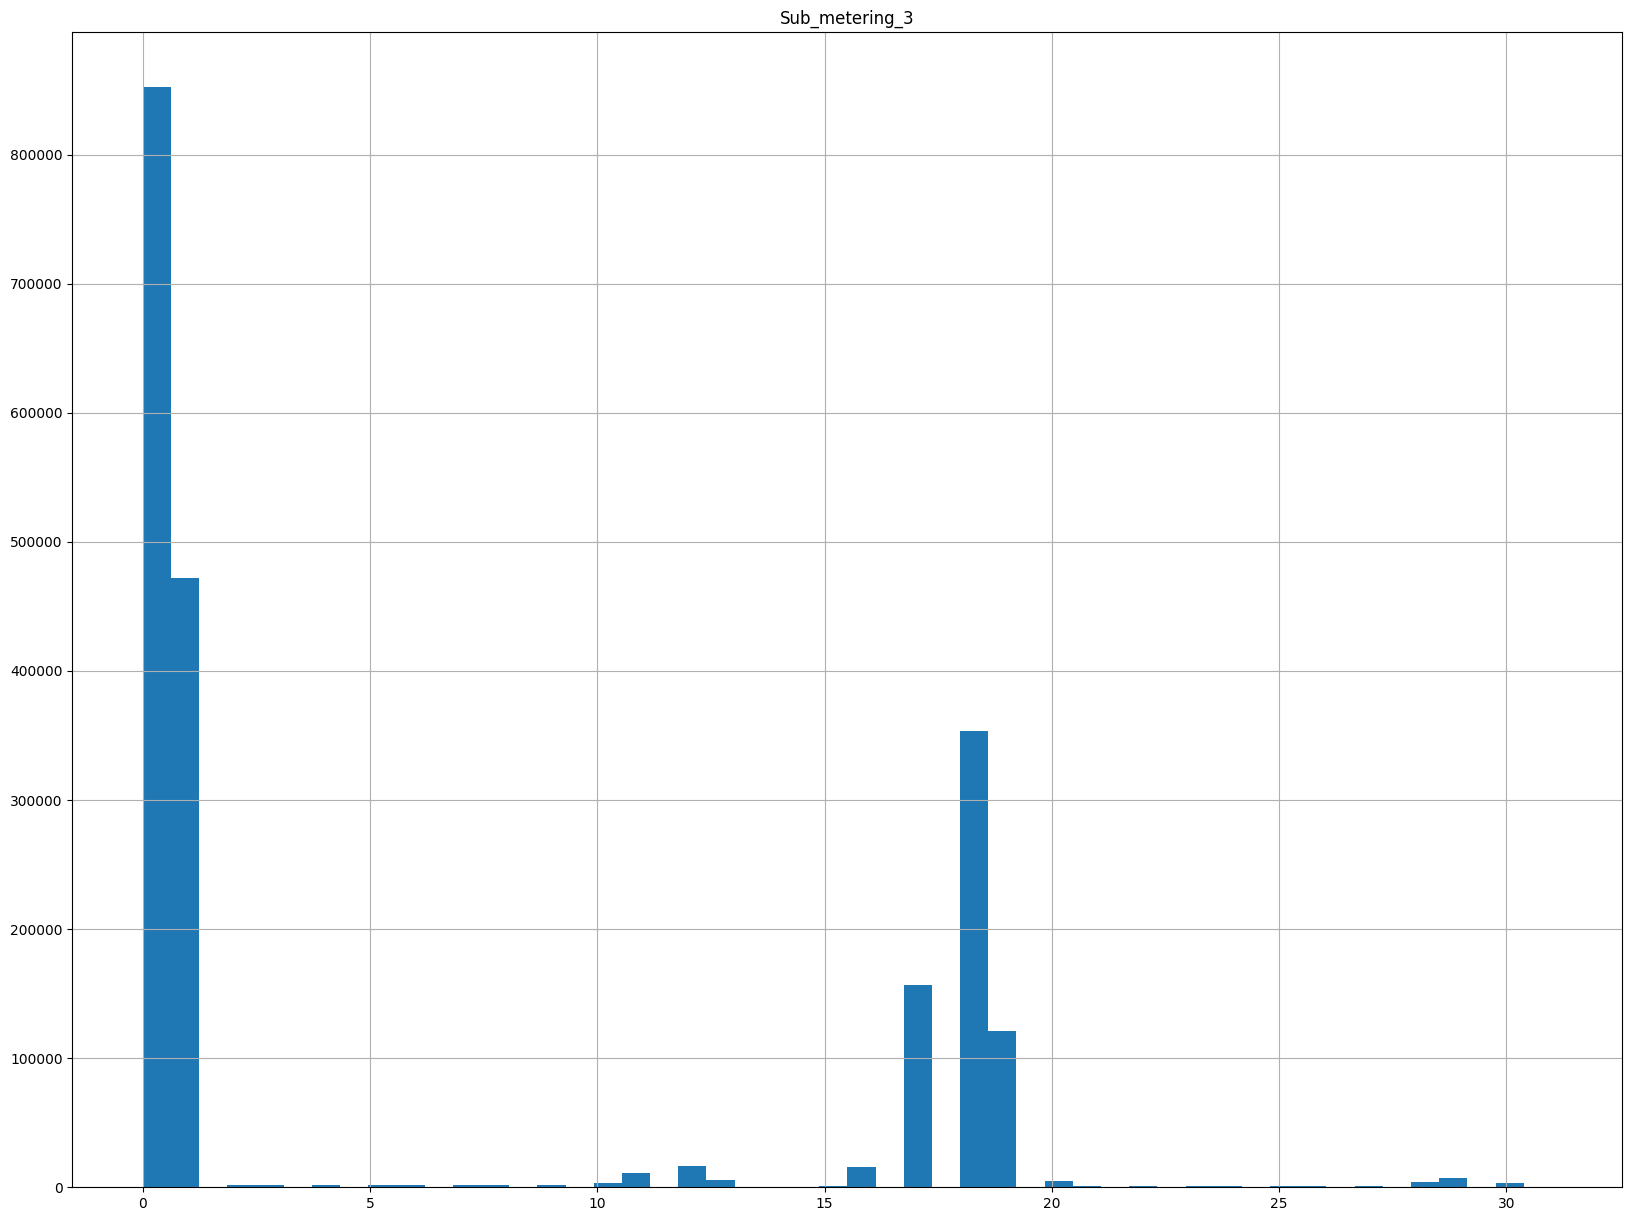

In [ ]:
power_com_df = pd.DataFrame(power_com.data.features)
power_com_df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
power_com_df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [ ]:
print(f"Max and Min Voltage Comsumption\n{np.max(power_com_df.Voltage.value_counts())}\n{np.min(power_com_df.Voltage.value_counts())}")


Max and Min Voltage Comsumption
25979
1


In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

X = power_com_df.drop(['Date','Time'], axis=1)
y = power_com_df.Voltage

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape
X_train.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
721792,0.428,0.236,245.840,2.000,0.000,0.000,1.0
1629339,0.316,0.100,245.590,1.200,0.000,0.000,1.0
1788820,1.020,0.072,242.820,4.200,0.000,0.000,1.0
290671,0.196,0.084,239.080,0.800,0.000,0.000,0.0
276338,0.206,0.092,240.270,1.000,0.000,0.000,0.0


from matplotlib import pyplot as plt
_df_18['Sub_metering_3'].plot(kind='hist', bins=20, title='Sub_metering_3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_19.groupby('Global_active_power').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_20.groupby('Global_reactive_power').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_21.groupby('Voltage').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_22.groupby('Global_intensity').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23['Sub_metering_3'].plot(kind='line', figsize=(8, 4), title='Sub_metering_3')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Global_reactive_power'].value_counts()
    for x_label, grp in _df_24.groupby('Global_active_power')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Global_active_power')
_ = plt.ylabel('Global_reactive_power')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Voltage'].value_counts()
    for x_label, grp in _df_25.groupby('Global_reactive_power')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Global_reactive_power')
_ = plt.ylabel('Voltage')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Global_intensity'].value_counts()
    for x_label, grp in _df_26.groupby('Voltage')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Voltage')
_ = plt.ylabel('Global_intensity')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['Global_active_power'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='Sub_metering_3', y='Global_active_power', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_28['Global_reactive_power'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_28, x='Sub_metering_3', y='Global_reactive_power', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_29['Voltage'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_29, x='Sub_metering_3', y='Voltage', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_30['Global_intensity'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_30, x='Sub_metering_3', y='Global_intensity', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

X = power_com_df.drop(['Date', 'Time'], axis=1)
y = power_com_df.Voltage

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

X_train = X_train.replace('?', np.nan)

num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

num_cols = X_train.select_dtypes(include=np.number).columns
cat_cols = X_train.select_dtypes(exclude=np.number).columns

X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)

KMeans(n_clusters=3)

In [ ]:
X_train['Cluster'] = kmeans.labels_

cluster_centers = kmeans.cluster_centers_
print("Cluster Centers:\n", cluster_centers)

Cluster Centers:
 [[5.43022573e-01 1.12684250e-01 2.41572432e+02 2.35865928e+00
  5.85698657e-02 8.21724935e-01 5.32952864e-01]
 [4.04454054e+00 1.99370516e-01 2.37113668e+02 1.71579198e+01
  3.68389756e+01 3.24928577e+00 1.11924254e+01]
 [1.90107179e+00 1.34645684e-01 2.39708756e+02 7.94857954e+00
  2.07618520e-01 2.03116013e+00 1.78409468e+01]]
